In [1]:
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import os
from astropy.io import ascii

# Problem 1: Addition and Convolution

## Part a

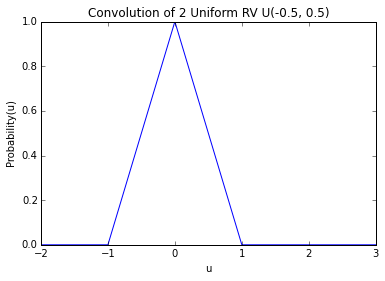

In [2]:
u = np.arange(-2, 4)
p_u = u.copy()

p_u[u< 0] = u[u<0]+1
p_u[u>=0] = -u[u>=0] + 1
p_u[u < -1] = 0
p_u[u > 1] = 0

pyplot.plot(u, p_u)
pyplot.xlabel('u')
pyplot.ylabel('Probability(u)')
pyplot.title('Convolution of 2 Uniform RV U(-0.5, 0.5)')

##Part B

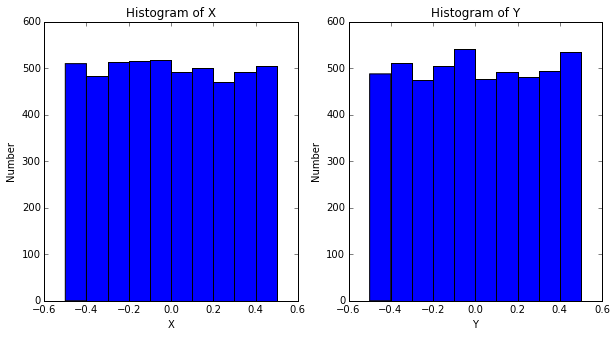

In [3]:
#Build x and y
x = np.random.uniform(-0.5, 0.5, 5000)
y = np.random.uniform(-0.5, 0.5, 5000)

#Plot histograms
fig = pyplot.figure(figsize = [10, 5])

ax1 = fig.add_subplot(1, 2, 1)
junk = ax1.hist(x)
ax1.set_xlabel('X')
ax1.set_ylabel('Number')
ax1.set_title('Histogram of X')

ax2 = fig.add_subplot(1, 2, 2)
junk = ax2.hist(y)
ax2.set_xlabel('Y')
ax2.set_ylabel('Number')
ax2.set_title('Histogram of Y')

## Part c

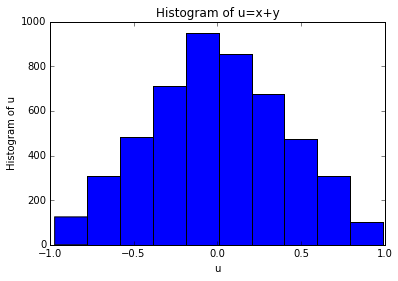

In [4]:
u = x+y
pyplot.hist(u)
pyplot.xlabel('u')
pyplot.ylabel('Histogram of u')
pyplot.title('Histogram of u=x+y')

This does look like what I plotted in part a

# Problem 2

## Part c

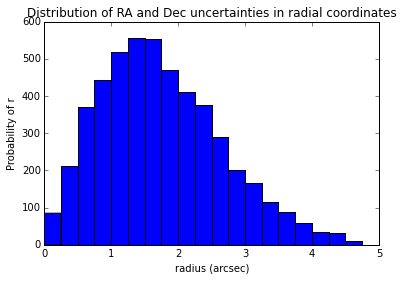

In [6]:
#Make 2 gaussian RV with mean = 0, std = 1.4
x = np.random.normal(loc = 0.0, scale = 1.4, size = 5000)
y = np.random.normal(loc = 0.0, scale = 1.4, size = 5000)

#Convert to polar coordinates
r = np.sqrt(x**2 + y**2)

#Make histogram of r
n, bins, patches = pyplot.hist(r, bins = np.arange(0, 5, 0.25))
pyplot.xlabel('radius (arcsec)')
pyplot.ylabel('Probability of r')
pyplot.title('Distribution of RA and Dec uncertainties in radial coordinates')

Calculate number of objects with errors less than 3 arcseconds

In [9]:
#Find bin centers rather than bin edges
bin_centers = bins[0:-1]+0.25/2.
#Calculate the number of objects with errors less than 3 arcseconds
total_less_than_3 = n[bin_centers<3].sum()
print('(fraction within r=3) =', total_less_than_3/5000.)

(fraction within r=3) = 0.8968


# Problem 3

## Part a

In [11]:
data_dir = '../data'

#Read in data
tbdata = ascii.read(os.path.join(data_dir, 'lx_t.dat'))
#Take log of L and T
x = np.log10(tbdata['L'])
y = np.log10(tbdata['T'])

Calculate the covariance matrix

In [17]:

cov_matrix = np.zeros((2,2))
mean_x = np.mean(x)
mean_y = np.mean(y)

cov_matrix[0, 0] = ((x - mean_x)*(x - mean_x)).mean()
cov_matrix[1, 0] = ((x - mean_x)*(y - mean_y)).mean()
cov_matrix[0, 1] = ((y - mean_y)*(x - mean_x)).mean()
cov_matrix[1, 1] = ((y - mean_y)*(y - mean_y)).mean()
print('Covariance Matrix\n', cov_matrix)

Covariance Matrix
 [[ 1.04804601  0.26623149]
 [ 0.26623149  0.08407091]]


Calculate r

In [14]:
numerator = ((x - mean_x)*(y - mean_y)).sum()
denom_sum1 = ((x-mean_x)**2).sum()
denom_sum2 = ((y - mean_y)**2).sum()
r = numerator/np.sqrt(denom_sum1)/np.sqrt(denom_sum2)
print('r = ', r)

r =  0.89690488054


## Part b

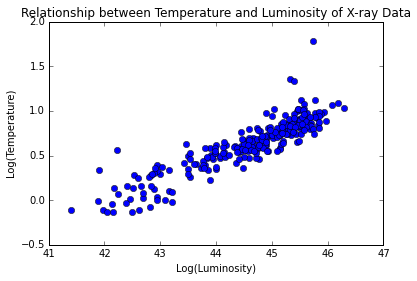

In [16]:
pyplot.plot(x, y, 'o')
pyplot.xlabel('Log(Luminosity)')
pyplot.ylabel('Log(Temperature)')
pyplot.title('Relationship between Temperature and Luminosity of X-ray Data')

Given the value of r and the plot of the data I would say these data are correlated

Determine significance of Null Hypothesis

In [14]:
sigma = 1./np.sqrt(len(x))
r_sig = r/sigma
print('r is {} sigma from 0'.format(r_sig))

r is 14.819300711340397 sigma from 0


We can reject the null hypthesis that these two samples are uncorrelated with much better than 95% confidence

## Part c

Find best fit line

In [25]:
sigma_xy = 1./len(x)* ((x - mean_x)*(y - mean_y)).sum()
a = mean_y - cov_matrix[1,0]/(cov_matrix[0,0])*mean_x
b = cov_matrix[1,0]/(cov_matrix[0,0])

print('a = {}\nb = {}'.format(a, b))

a = -10.693324929578553
b = 0.254026529886586


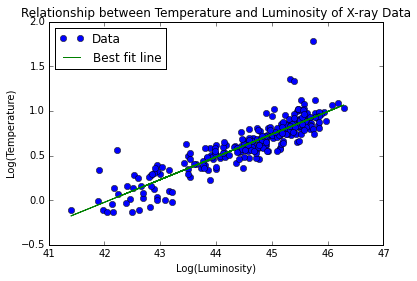

In [23]:
pyplot.plot(x, y, 'o', label = 'Data')
pyplot.plot(x, a+x*b, label = 'Best fit line')
pyplot.xlabel('Log(Luminosity)')
pyplot.ylabel('Log(Temperature)')
pyplot.title('Relationship between Temperature and Luminosity of X-ray Data')
pyplot.legend(loc = 'best')